# INTRODUCTION



*   NAME - SHUVRANSHU SENGUPTA
*   SCHOOL OF ELECTRONICS ENGIEERING
*   KALINGA INSTITUTE OF INDUSTRIAL TECHNOLOGY (KIIT) Deemed to be University


In this project I have created a Convolutional Neural Network which will be able to predict whether a plant is suffering from a disease or not. Here I have used different layers and other hyperparameters for building, training and testing this classifictaion model. Along with that we'll also be using tensorflow and keras for this project.

# MOUNTING DRIVE AND IMPORTING LIBRARIES



*   Upload the dataset in your drive and then mount the drive in your google colab
*   Import all the necessary libraries required for this project



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now we will import all the required libraries. As we are making a CNN model we will import all the required layers, activations, optimizers, etc.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical 

# VISUALIZING THE DATASET

Now we'll visualize our dataset. For an example, we'll plot 16 images using Matplotlib

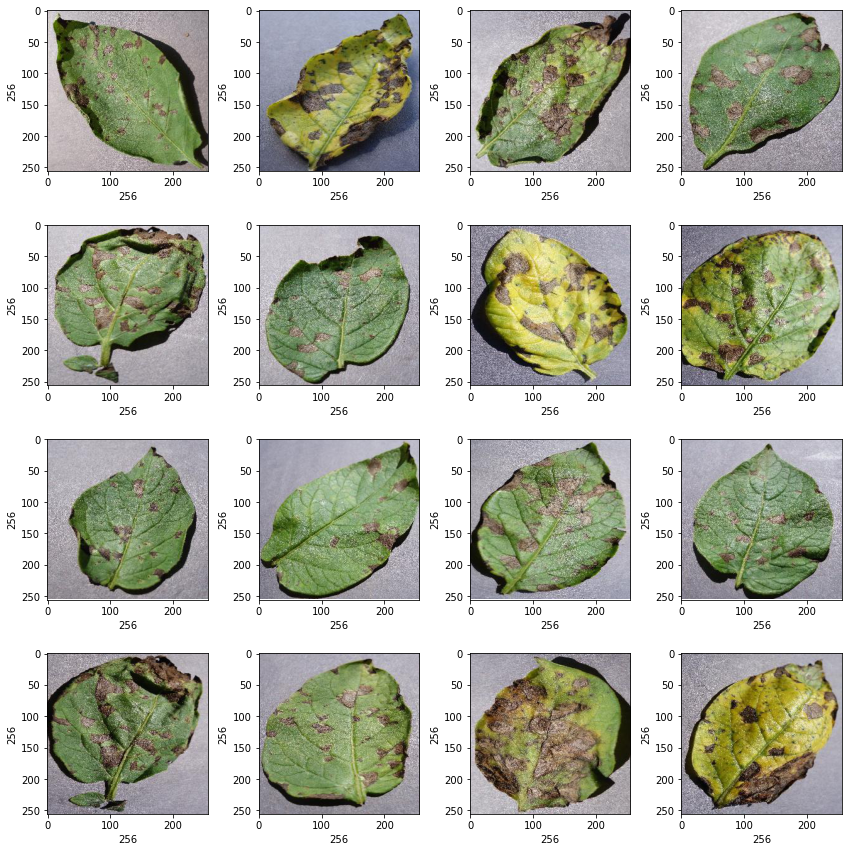

In [3]:
# Plotting 12 images to check dataset

plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/PROJECTS/Plant Disease Prediction/Dataset/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

# CONVERTING IMAGES INTO NUMPY ARRAY

After visualizing the images, we'll create a function which will convert the images into a numpy array. In order to normalise the dataset it is required.

In [4]:
#Converting Images to array 

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
dir = "/content/drive/My Drive/PROJECTS/Plant Disease Prediction/Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array

for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

Now we print the number of images in each class in order to check whether the dataset is balanced or not throughout the classes.

In [6]:
# Visualize the number of classes count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

2    300
1    300
0    300
dtype: int64

In [7]:
# printing the shape of any image

image_list[0].shape

(256, 256, 3)

In [8]:
# Checking the total number of images which is the length of label_list

label_list = np.array(label_list)
label_list.shape

(900,)

# SK LEARN TRAINING TESTING AND SPLITTING THE DATA

Now we will use sklearn train_test_split to split the dataset into testing and training data. Here I have taken test size as 0.2 so my data will be divided into 80% training and 20% testing data.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

In [10]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 112896)            0         
                                                                 
 dense (Dense)               (None, 64)                7

Now while compiling the model we need to set the type of loss which will be Binary Crossentropy for our model alongwith this we will also need to set the optimizer and the metrics respectively.

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

Now finally we'll split the dataset into validation and training data.

In [14]:
# Splitting the training data set into training and validation data sets

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

Then we'll fit the model with the data and find out the accuracy at each epoch to see how our model is learning. After that we'll train our model on 10 epochs and a batch size of 128. During each epoch we can see how the model is performing by viewing the training and validation accuracy.

In [15]:
# Training the model

epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 42s 8s/step - loss: 0.9000 - accuracy: 0.5382 - val_loss: 0.6114 - val_accuracy: 0.6319
Epoch 2/50
5/5 [==============================] - 41s 8s/step - loss: 0.4724 - accuracy: 0.7917 - val_loss: 0.3284 - val_accuracy: 0.9375
Epoch 3/50
5/5 [==============================] - 36s 7s/step - loss: 0.2907 - accuracy: 0.9219 - val_loss: 0.2422 - val_accuracy: 0.8958
Epoch 4/50
5/5 [==============================] - 36s 7s/step - loss: 0.1986 - accuracy: 0.9444 - val_loss: 0.1549 - val_accuracy: 0.9583
Epoch 5/50
5/5 [==============================] - 37s 7s/step - loss: 0.1322 - accuracy: 0.9757 - val_loss: 0.1575 - val_accuracy: 0.9306
Epoch 6/50
5/5 [==============================] - 36s 7s/step - loss: 0.1076 - accuracy: 0.9670 - val_loss: 0.1446 - val_accuracy: 0.9444
Epoch 7/50
5/5 [==============================] - 37s 7s/step - loss: 0.0979 - accuracy: 0.9688 - val_loss: 0.0980 - val_accuracy: 0.9514
Epoch 8/50
5/5 [==================

# PLOTTING ACCURACY

Now we'll plot the accuracy of the model for the training data

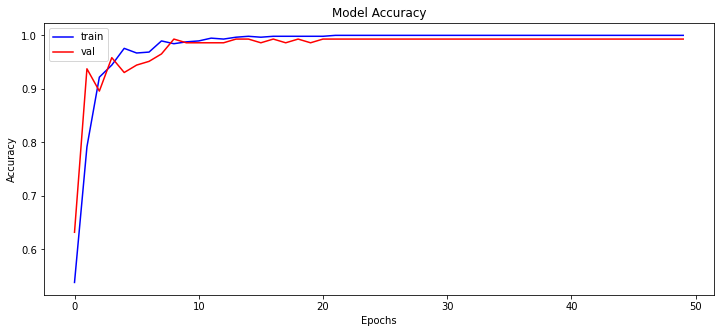

In [16]:
#Plotting the training data

plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='r')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

After that we evaluate the model to check its accuracy

In [17]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 3s 562ms/step - loss: 0.0505 - accuracy: 0.9889
Accuracy: 98.88888597488403


# CHECKING PREDICTION VIA THE TESTING DATA

Next we will use this model to predict the testing dataset label.

In [18]:
y_pred = model.predict(x_test)

Finally printing out the original and the predicted label.

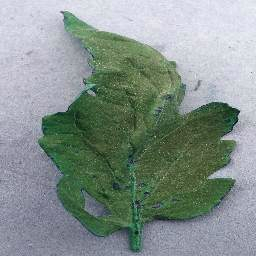

In [19]:
# Plotting image to compare

img = array_to_img(x_test[12])
img

In [20]:
# Finding max value from predition list and comaparing original value vs predicted

print("Originally : ",all_labels[np.argmax(y_test[12])])
print("Predicted : ",all_labels[np.argmax(y_pred[12])])

Originally :  Tomato-Bacterial_spot
Predicted :  Tomato-Bacterial_spot


# CONCLUSION

We started with loading the dataset into google colab using google drive and visualizing the images. Normalizing is an important step when working with any type of dataset. After that we created a CNN Model which is further used for predicting the plant diseases using the image supplied to model. This model is highly beneficial as it can be used by different agricultural firms and farmers to increase their yield and stop wastage of crops due to disease.